# Import Modules

In [1]:
from glob import glob
import geopandas as gp
import numpy as np
import pandas as pd
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
import random
import os
from shapely.geometry import Point

pd.options.display.max_rows = 100

import warnings
warnings.filterwarnings("ignore")

try:
    if kernel_is_loaded:
        pass
except:
    os.chdir('/'.join(os.getcwd().split('/')[:-1]))
    kernel_is_loaded = True

# Seeding

In [2]:
def seed_everything(seed = 42):
    random.seed(seed)
    np.random.seed(seed)
    
seed_everything()

In [8]:
potato = pd.read_csv('/wadhwani_kdss/c_drive/Users/user/abhijeeth/Code_Files_ML_models/data/UP_Potato_NDVI.csv',index_col = 'UID')
print(potato.shape)

display(potato.head())


(2955, 20)


,STATE_NAME,DISTRICT,Crop,Year,Shape,Lat,Long,Oct_1FN,Oct_2FN,Nov_1FN,Nov_2FN,Dec_1FN,Dec_2FN,Jan_1FN,Jan_2FN,Feb_1FN,Feb_2FN,Mar_1FN,Mar_2FN,Apr_1FN
UID,,,,,,,,,,,,,,,,,,,,
2,UTTAR PRADESH,ALIGARH,Potato,2022-23,Point,27.728040,77.982026,0.76,0.39,0.16,0.18,0.59,0.73,0.76,0.84,0.78,0.59,0.18,0.27,0.42
3,UTTAR PRADESH,AGRA,Potato,2022-23,Point,27.151477,77.848744,0.14,0.23,0.13,0.52,0.78,0.88,0.65,0.79,0.70,0.32,0.16,0.25,0.22
4,UTTAR PRADESH,FARRUKHABAD,Potato,2022-23,Point,27.199457,79.570204,0.13,0.21,0.09,0.50,0.82,0.87,0.09,0.82,0.57,0.25,0.15,0.16,0.52
6,UTTAR PRADESH,FIROZABAD,Potato,2022-23,Point,27.241944,78.426063,0.41,0.29,0.12,0.58,0.89,0.93,0.07,0.83,0.61,0.27,0.18,0.10,0.17
7,UTTAR PRADESH,KANNAUJ,Potato,2022-23,Point,27.013613,79.826045,0.49,0.43,0.12,0.57,0.72,0.71,0.06,0.64,0.46,0.49,0.16,0.23,0.69


In [9]:
potato.STATE_NAME.value_counts()

STATE_NAME
UTTAR PRADESH    2955
Name: count, dtype: int64

In [20]:
months = ['Oct_1FN','Oct_2FN','Nov_1FN','Nov_2FN','Dec_1FN','Dec_2FN','Jan_1FN', 'Jan_2FN', 'Feb_1FN', 'Feb_2FN', 'Mar_1FN', 'Mar_2FN', 'Apr_1FN']
print(months)

['Oct_1FN', 'Oct_2FN', 'Nov_1FN', 'Nov_2FN', 'Dec_1FN', 'Dec_2FN', 'Jan_1FN', 'Jan_2FN', 'Feb_1FN', 'Feb_2FN', 'Mar_1FN', 'Mar_2FN', 'Apr_1FN']


In [21]:
potato[months] = potato[months]*100+100

# Data Visulization

<Axes: >

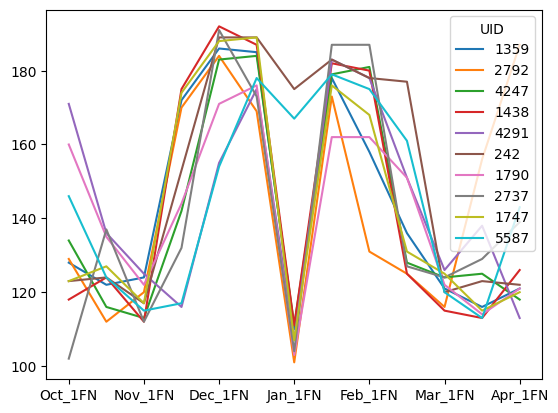

In [22]:
potato.loc[:,'Oct_1FN':'Apr_1FN'].sample(10, random_state=9).T.plot()

In [23]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [24]:
lower_bounds = list(range(200, 110-1, -10))

# Initialize an empty dictionary to hold the counts for each range
counts_dict = {f'{lb}-{lb+10}': [] for lb in lower_bounds}

# Iterate through the columns of the 'rice' DataFrame
for column in months:
    # Calculate counts for each range and append to the counts_dict
    for lb in lower_bounds:
        ub = lb + 10
        counts = ((potato[column] >= lb) & (potato[column] < ub)).sum()
        counts_dict[f'{lb}-{ub}'].append(counts)

# Create a new DataFrame from the counts_dict
counts_df = pd.DataFrame(counts_dict, index=months)
df = counts_df.loc['Oct_1FN':'Apr_1FN'].T
display(df.style.apply(highlight_max,axis=0))


,Oct_1FN,Oct_2FN,Nov_1FN,Nov_2FN,Dec_1FN,Dec_2FN,Jan_1FN,Jan_2FN,Feb_1FN,Feb_2FN,Mar_1FN,Mar_2FN,Apr_1FN
200-210,0,0,1,0,0,6,1,6,0,0,0,0,3
190-200,4,1,0,0,250,482,0,25,3,1,0,0,15
180-190,94,12,1,110,1650,1337,90,1413,570,25,0,11,71
170-180,300,47,1,320,646,644,365,1131,1124,117,9,32,90
160-170,238,131,3,464,292,411,204,252,559,239,16,34,148
150-160,191,189,8,552,92,66,86,58,271,386,52,50,193
140-150,263,297,26,471,20,6,43,27,172,517,128,104,259
130-140,400,647,146,466,4,2,52,24,139,690,334,377,445
120-130,719,1100,571,391,1,0,76,17,85,820,1438,1156,619
110-120,480,528,2144,179,0,1,304,2,31,160,977,1164,1098


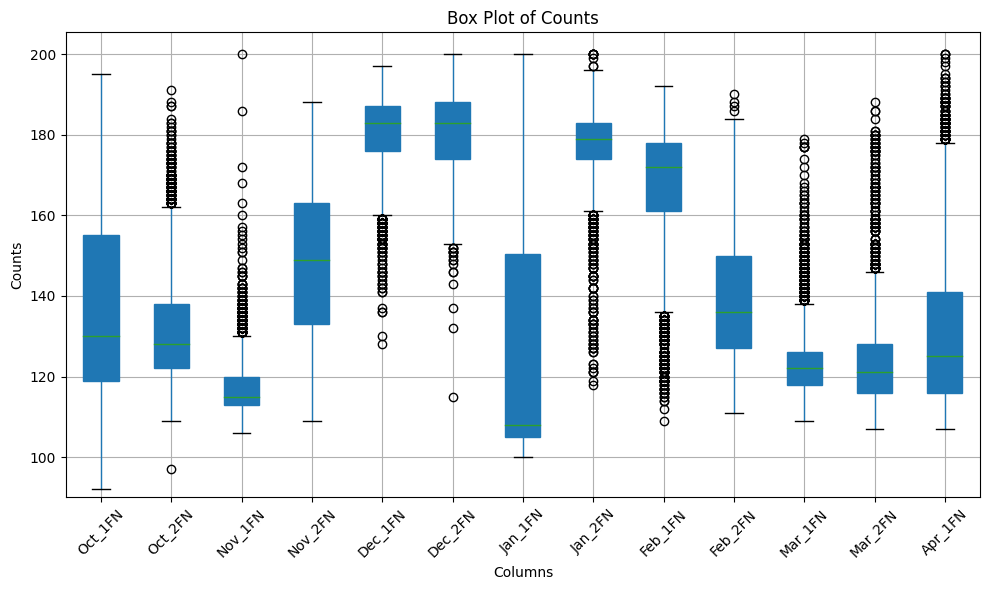

In [26]:
# Create a box plot for the DataFrame
plt.figure(figsize=(10, 6))  # Set the figure size
potato.loc[:,'Oct_1FN':'Apr_1FN'].boxplot(patch_artist =True)

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Counts')
plt.title('Box Plot of Counts')
        
plt.ylim(90)
# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [27]:
potato.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,2955.0,27.284065,0.588705,24.921021,27.028283,27.249967,27.571822,28.723763
Long,2955.0,79.241923,1.222734,77.409666,78.187946,79.185744,79.859186,84.610737
Oct_1FN,2955.0,136.164805,23.166969,92.000000,119.000000,130.000000,155.000000,195.000000
Oct_2FN,2955.0,131.696108,14.290571,97.000000,122.000000,128.000000,138.000000,191.000000
Nov_1FN,2955.0,117.231134,7.225011,106.000000,113.000000,115.000000,120.000000,200.000000
Nov_2FN,2955.0,148.203723,18.499807,109.000000,133.000000,149.000000,163.000000,188.000000
Dec_1FN,2955.0,180.239594,9.395118,128.000000,176.000000,183.000000,187.000000,197.000000
Dec_2FN,2955.0,180.321489,9.736727,115.000000,174.000000,183.000000,188.000000,200.000000
Jan_1FN,2955.0,124.206091,28.059092,100.000000,105.000000,108.000000,150.500000,200.000000
Jan_2FN,2955.0,177.202369,9.470958,118.000000,174.000000,179.000000,183.000000,200.000000


# Data Cleaning

In [28]:
outliers = potato[potato.loc[:,'Oct_1FN':'Nov_2FN'].apply(lambda row:any((i == 1)|(i == 0) for i in row), axis=1)]

# Rows which have 0s or 1s in the 6 possible sowing periods for mustard are dropped
potato.drop(outliers.index, inplace=True)

display(f'{outliers.shape[0]} dropped', potato.loc[:,'Oct_1FN':'Apr_1FN'].describe().T)

'0 dropped'

,count,mean,std,min,25%,50%,75%,max
Oct_1FN,2955.0,136.164805,23.166969,92.0,119.0,130.0,155.0,195.0
Oct_2FN,2955.0,131.696108,14.290571,97.0,122.0,128.0,138.0,191.0
Nov_1FN,2955.0,117.231134,7.225011,106.0,113.0,115.0,120.0,200.0
Nov_2FN,2955.0,148.203723,18.499807,109.0,133.0,149.0,163.0,188.0
Dec_1FN,2955.0,180.239594,9.395118,128.0,176.0,183.0,187.0,197.0
Dec_2FN,2955.0,180.321489,9.736727,115.0,174.0,183.0,188.0,200.0
Jan_1FN,2955.0,124.206091,28.059092,100.0,105.0,108.0,150.5,200.0
Jan_2FN,2955.0,177.202369,9.470958,118.0,174.0,179.0,183.0,200.0
Feb_1FN,2955.0,166.984772,15.810150,109.0,161.0,172.0,178.0,192.0
Feb_2FN,2955.0,139.504230,15.608626,111.0,127.0,136.0,150.0,190.0


In [29]:
def harvest_avg_impute(row):
    lst = deepcopy(row)
    hrvst_strt_idx = lst.index.get_loc('Mar_1FN')
    for i in range(len(lst.loc['Mar_1FN':'Mar_2FN'])):
        actual_idx = i + hrvst_strt_idx
        if (lst[actual_idx] == 1) or (lst[actual_idx] == 0):
            if lst[actual_idx-1] < 140:
                lst[actual_idx] = (lst[actual_idx-1] + lst[actual_idx+1])/2
    return lst

# Imputing the possible harvest fns with the average of its immediate neighbours
potato = potato.apply(harvest_avg_impute, axis=1)

new_outliers = potato[potato.loc[:,'Mar_1FN':'Mar_2FN'].apply(lambda row:any((i == 1)|(i == 0) for i in row), axis=1)]
outliers = pd.concat([outliers, new_outliers])

# if 0s and 1s still exit in the possible harvest periods, those rows are dropped
potato.drop(new_outliers.index, inplace=True)

display(f'{new_outliers.shape[0]} dropped', potato.loc[:,'Oct_1FN':'Apr_1FN'].describe().T)

'0 dropped'

,count,mean,std,min,25%,50%,75%,max
Oct_1FN,2955.0,136.164805,23.166969,92.0,119.0,130.0,155.0,195.0
Oct_2FN,2955.0,131.696108,14.290571,97.0,122.0,128.0,138.0,191.0
Nov_1FN,2955.0,117.231134,7.225011,106.0,113.0,115.0,120.0,200.0
Nov_2FN,2955.0,148.203723,18.499807,109.0,133.0,149.0,163.0,188.0
Dec_1FN,2955.0,180.239594,9.395118,128.0,176.0,183.0,187.0,197.0
Dec_2FN,2955.0,180.321489,9.736727,115.0,174.0,183.0,188.0,200.0
Jan_1FN,2955.0,124.206091,28.059092,100.0,105.0,108.0,150.5,200.0
Jan_2FN,2955.0,177.202369,9.470958,118.0,174.0,179.0,183.0,200.0
Feb_1FN,2955.0,166.984772,15.810150,109.0,161.0,172.0,178.0,192.0
Feb_2FN,2955.0,139.504230,15.608626,111.0,127.0,136.0,150.0,190.0


In [30]:
def dip_impute(row):
    lst = deepcopy(row)
    act_strt_idx = lst.index.get_loc('Dec_1FN')
    for i in range(len(lst.loc['Dec_1FN':'Jan_1FN'])):
        actual_idx = i + act_strt_idx
        if (lst[actual_idx-1] - lst[actual_idx]) >= 20:
            lst[actual_idx] = (lst[actual_idx-1] + lst[actual_idx+1])/2
    return lst

# Imputing the dec_1f, dec_2f and jan_1f fornights with the averages if the dip is not less than 30 from the adjs 
potato = potato.apply(dip_impute, axis=1)

potato.loc[:,'Oct_1FN':'Apr_1FN'].describe().T

,count,mean,std,min,25%,50%,75%,max
Oct_1FN,2955.0,136.164805,23.166969,92.0,119.0,130.0,155.0,195.0
Oct_2FN,2955.0,131.696108,14.290571,97.0,122.0,128.0,138.0,191.0
Nov_1FN,2955.0,117.231134,7.225011,106.0,113.0,115.0,120.0,200.0
Nov_2FN,2955.0,148.203723,18.499807,109.0,133.0,149.0,163.0,188.0
Dec_1FN,2955.0,180.239594,9.395118,128.0,176.0,183.0,187.0,197.0
Dec_2FN,2955.0,179.675127,11.244334,132.0,174.0,183.0,188.0,200.0
Jan_1FN,2955.0,177.007445,8.384679,136.5,172.5,178.0,183.5,200.0
Jan_2FN,2955.0,177.202369,9.470958,118.0,174.0,179.0,183.0,200.0
Feb_1FN,2955.0,166.984772,15.810150,109.0,161.0,172.0,178.0,192.0
Feb_2FN,2955.0,139.504230,15.608626,111.0,127.0,136.0,150.0,190.0


# Determining sowing period

In [31]:
# Sowing period determination

threshold = 5

def sowing_period(row):
    sowing_periods = row.loc['Oct_1FN':'Nov_2FN'].index
    sowing_periods_NDVI = row.loc['Oct_1FN':'Nov_2FN']
    minima = np.argmin(sowing_periods_NDVI)
    ndvi_values = row.loc['Oct_1FN':'Apr_1FN']
    i = minima
    while i < len(sowing_periods):
        if 100 <= ndvi_values[i] <=140 :
            if (ndvi_values[i+1] - ndvi_values[i]) > threshold:
                if ((ndvi_values[i+1] - ndvi_values[i+2]) < 30):
                    return sowing_periods[i]
        i += 1
    return 'Unknown'

potato['sowing_period'] = potato.apply(sowing_period, axis=1)
# rice['sowing_year'] = [2023] * rice.shape[0]  # Update this based on sowing period change to be done

potato.sowing_period.value_counts()

sowing_period
Nov_1FN    2301
Oct_1FN     291
Nov_2FN     198
Oct_2FN     158
Unknown       7
Name: count, dtype: int64

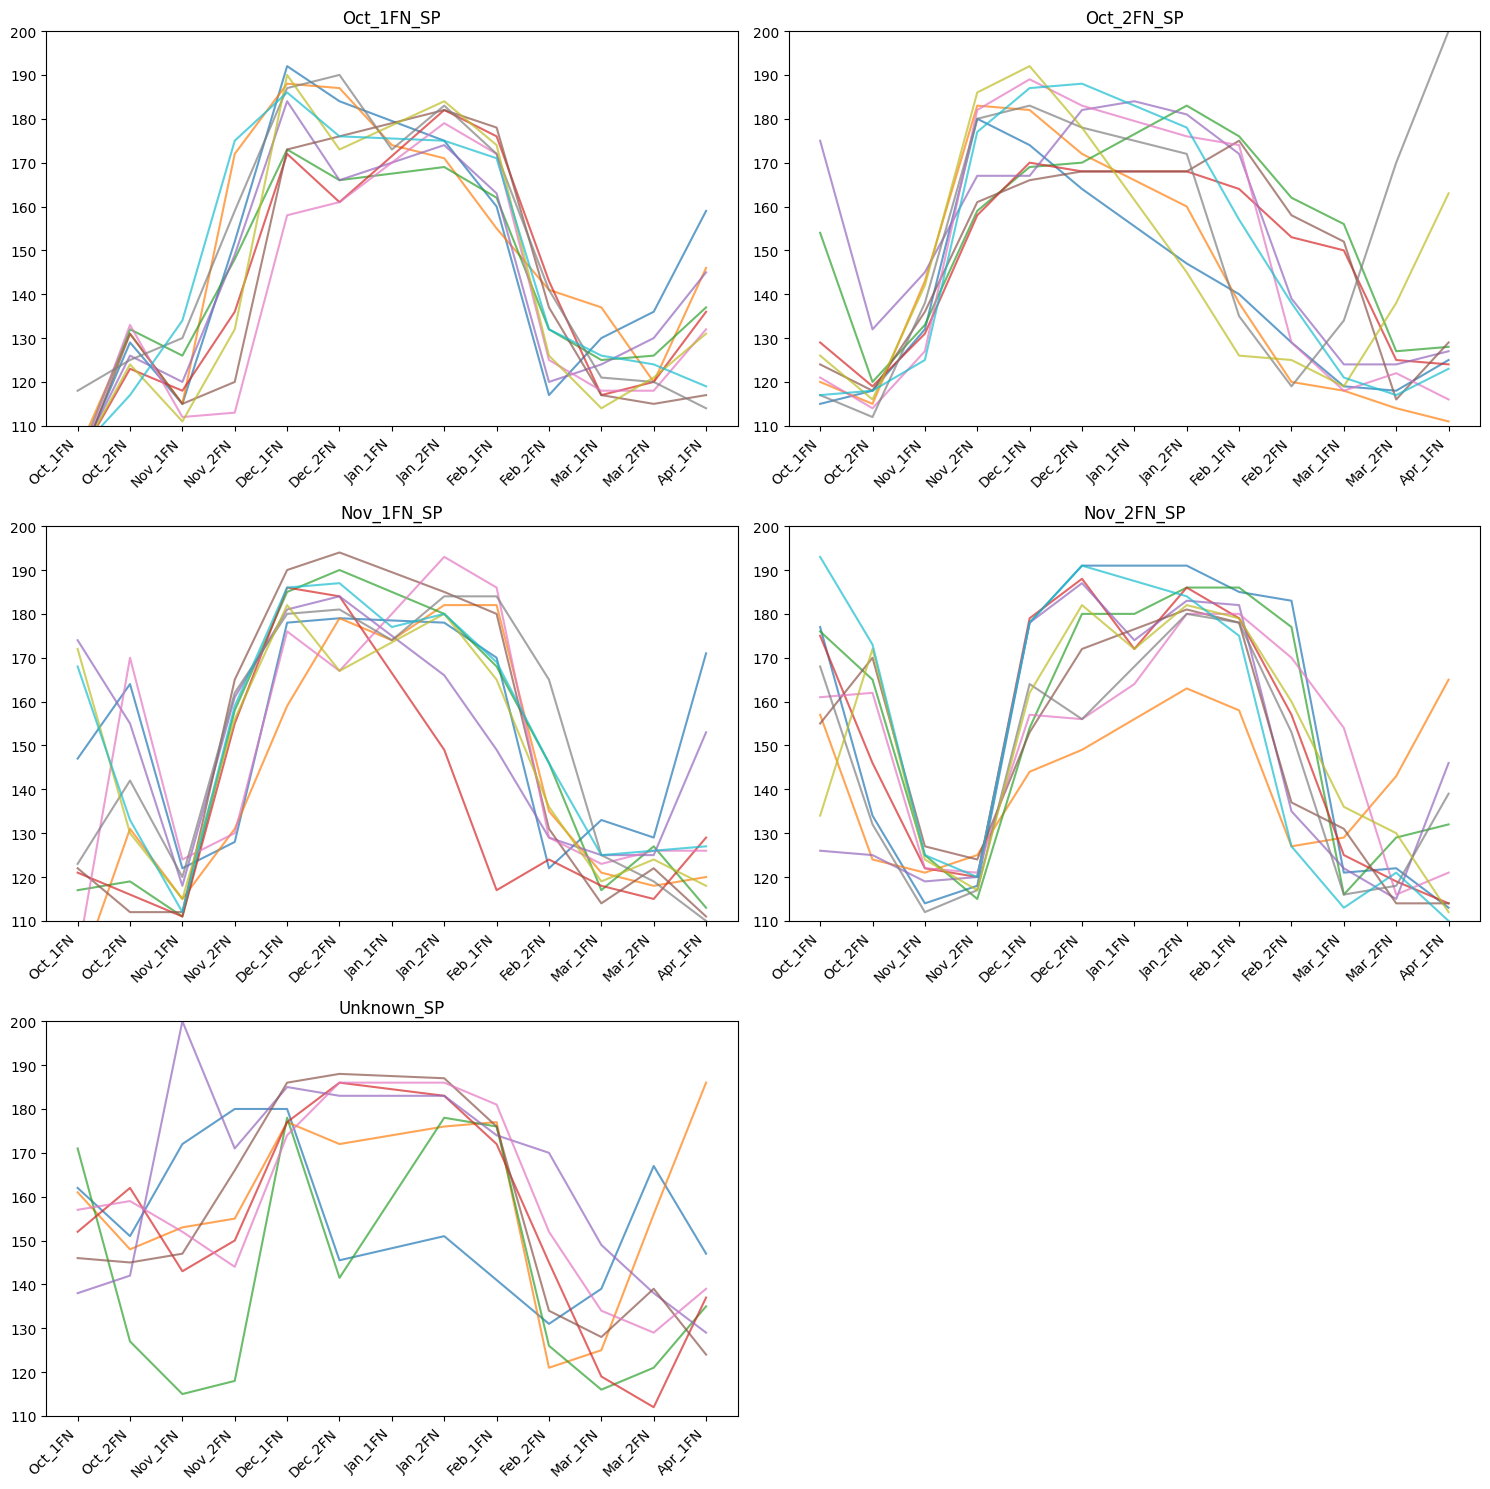

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

columns = months

# Apply Savitzky-Golay filter to each row and plot subplots based on 'sowing_period'
window_length = 5  # Adjust this value as needed
polyorder = 2  # Adjust this value as needed

# Get unique categories based on 'sowing_period'
categories = ['Oct_1FN','Oct_2FN','Nov_1FN','Nov_2FN','Unknown']

# Determine the number of rows and columns for subplots
num_categories = len(categories)
num_rows = (num_categories + 1) // 2  # Round up to ensure enough rows
num_cols = 2

# Create subplots for each category in a 2-column layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Plot data for each category
for i, category in enumerate(categories):
        category_data = potato[potato['sowing_period'] == category].loc[:, 'Oct_1FN':'Apr_1FN']
        rows = len(category_data)
        # print(rows)
        category_data = category_data.sample(min(10,rows),random_state=42)
    
        # Plot the smoothed data for the category
        axes[i].plot(category_data.T, alpha=0.7)
        axes[i].set_title(f'{category}_SP')
        axes[i].set_xticks(np.arange(0, len(columns), 1))
        axes[i].set_xticklabels(columns, rotation=45, ha='right')
        axes[i].set_yticks(np.arange(60, 220, 10))
        axes[i].set_ylim([110, 200])

# Hide any remaining empty subplots
for j in range(num_categories, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [33]:
new_outliers = potato[potato.sowing_period == 'Unknown']
outliers = pd.concat([outliers, new_outliers])

# Dropping the Unknown sp labels
potato.drop(new_outliers.index, inplace=True)

display(f'{new_outliers.shape[0]} dropped', potato.loc[:,'Oct_1FN':'Apr_1FN'].describe().T)

'7 dropped'

,count,mean,std,min,25%,50%,75%,max
Oct_1FN,2948.0,136.119403,23.170397,92.0,119.0,130.0,155.0,195.0
Oct_2FN,2948.0,131.658073,14.276528,97.0,122.0,128.0,138.0,191.0
Nov_1FN,2948.0,117.142469,6.899447,106.0,113.0,115.0,120.0,186.0
Nov_2FN,2948.0,148.187924,18.495846,109.0,133.0,149.0,163.0,188.0
Dec_1FN,2948.0,180.241180,9.404089,128.0,176.0,183.0,187.0,197.0
Dec_2FN,2948.0,179.694030,11.214712,132.0,174.0,183.0,188.0,200.0
Jan_1FN,2948.0,177.012890,8.365944,136.5,172.5,178.0,183.5,200.0
Jan_2FN,2948.0,177.201153,9.465558,118.0,174.0,179.0,183.0,200.0
Feb_1FN,2948.0,166.975237,15.815950,109.0,161.0,172.0,178.0,192.0
Feb_2FN,2948.0,139.503392,15.608210,111.0,127.0,136.0,150.0,190.0


# Determining Harvest period

In [46]:
# Getting the harvest_period fortnight labels

def harvest_period(row):
    sowing_period_idx = row.index.get_loc(row['sowing_period'])
    i = sowing_period_idx + 4
    while i < len(row.loc[:'Mar_2FN']):
        # print(row[i],row[i+1])
        if (row[i] < 140) & (row[i+1]<140):
            return row.index[i-1]
        i += 1
    return 'Unknown'

potato['harvest_period'] = potato.apply(harvest_period, axis=1)

potato.harvest_period.value_counts()

harvest_period
Feb_1FN    1403
Feb_2FN    1095
Jan_2FN     214
Mar_1FN     143
Unknown      53
Jan_1FN      38
Dec_2FN       1
Dec_1FN       1
Name: count, dtype: int64

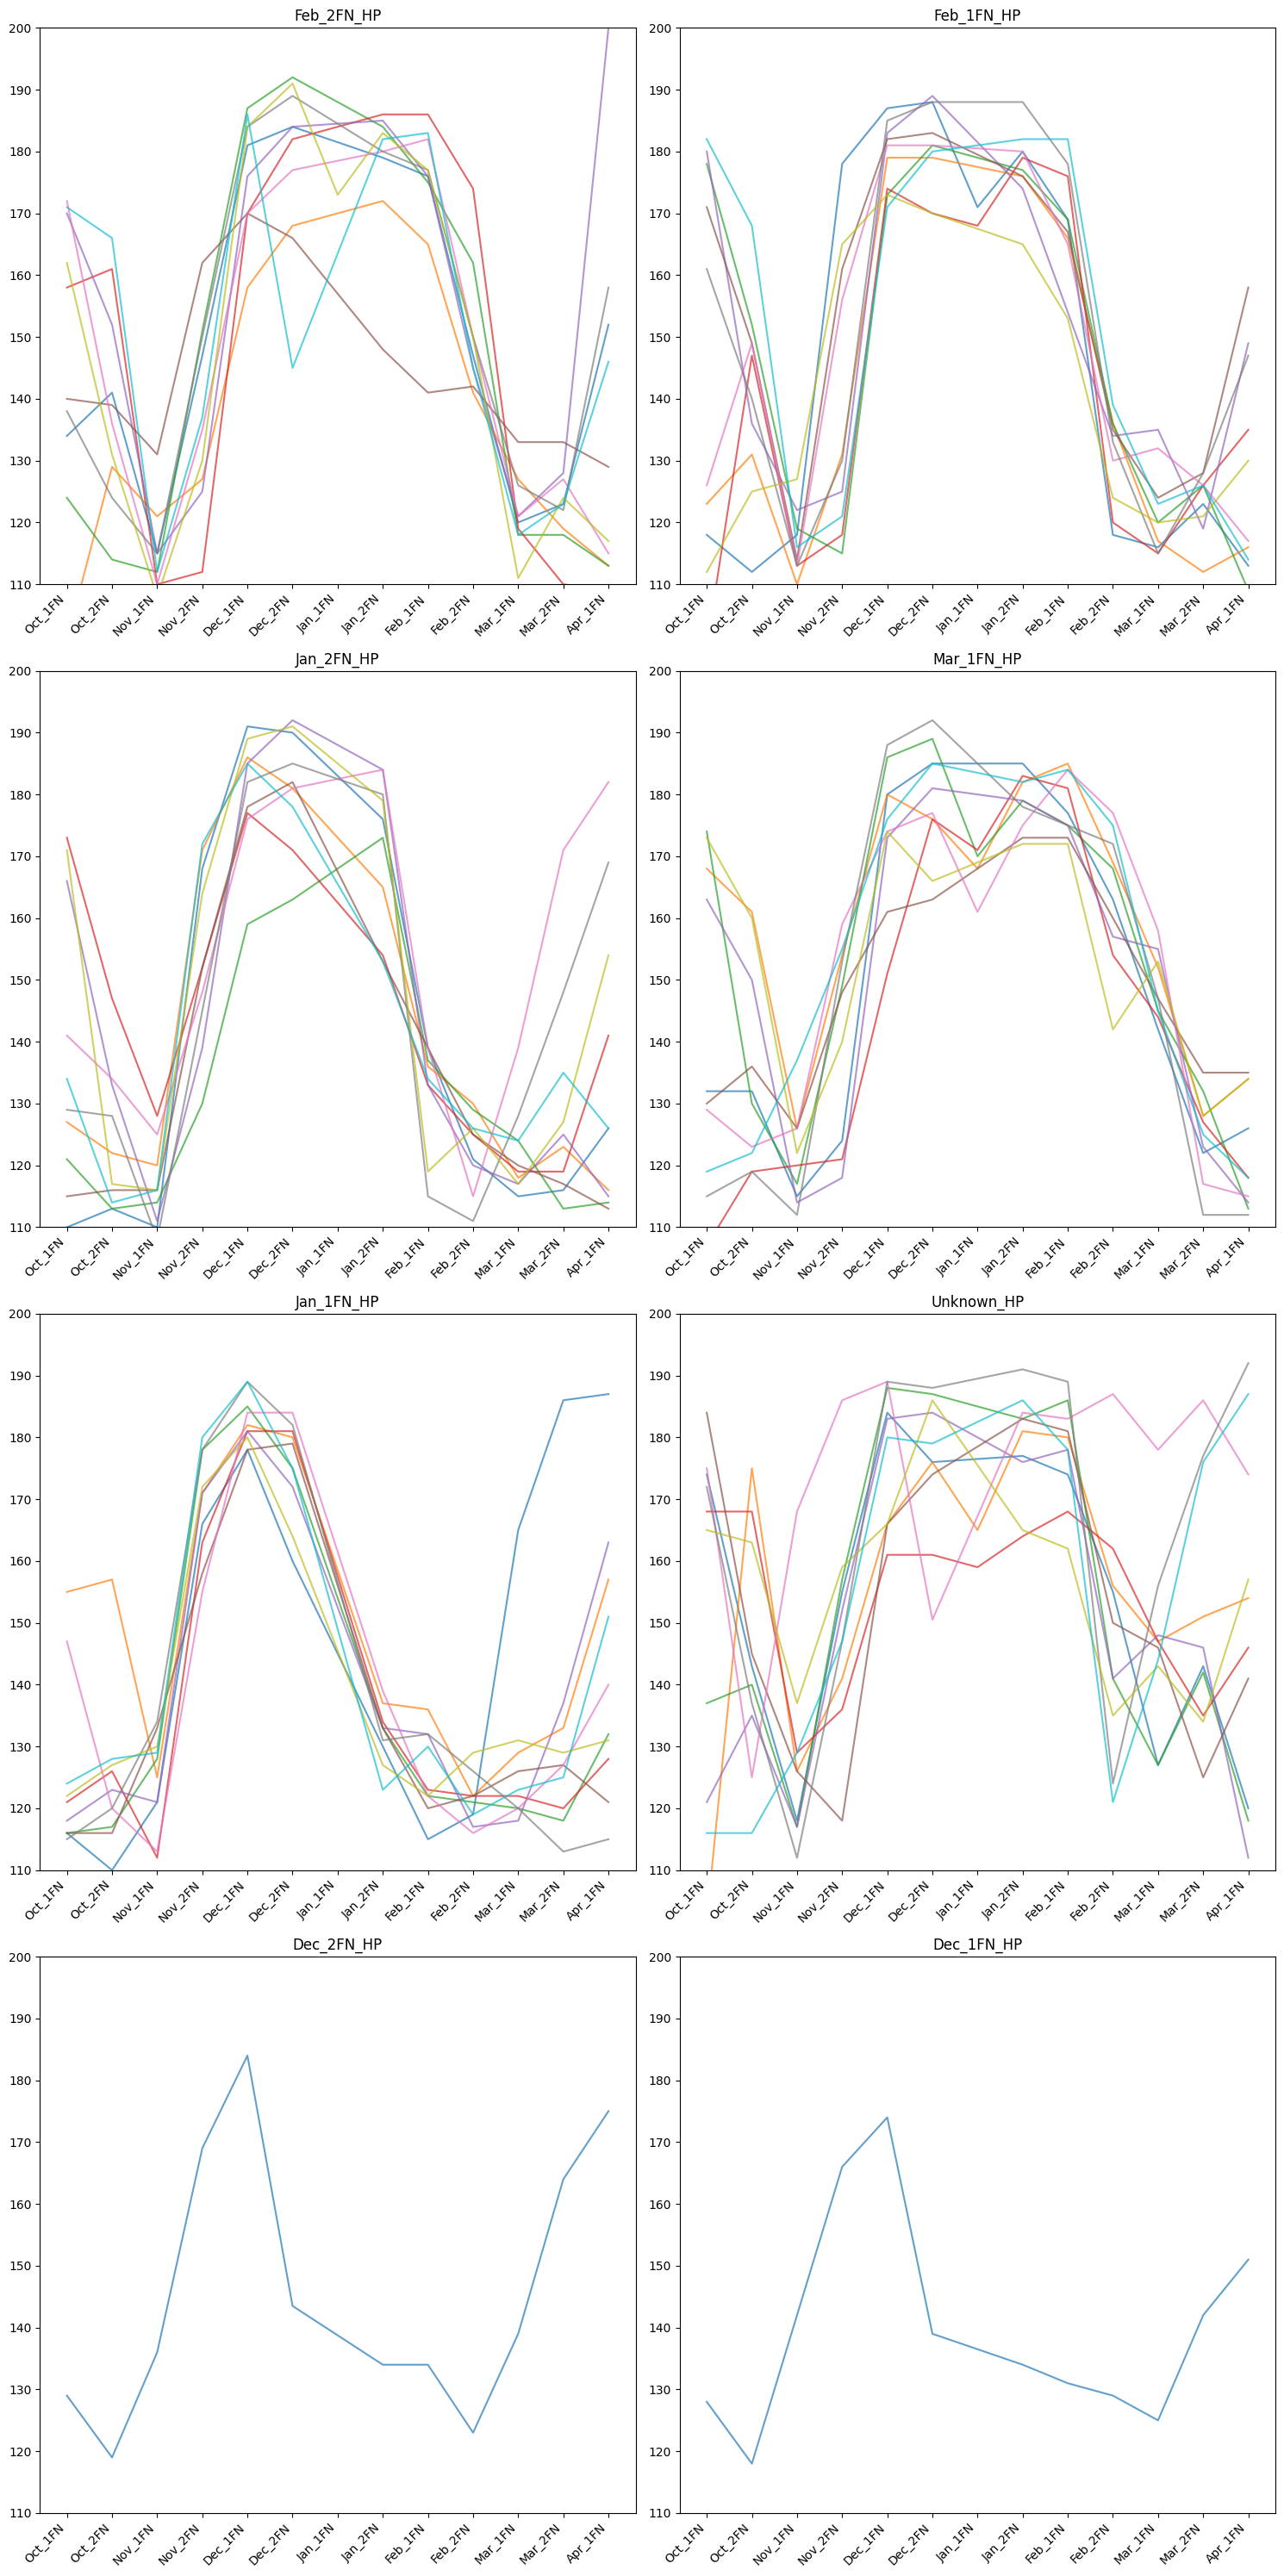

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

columns = months

# Apply Savitzky-Golay filter to each row and plot subplots based on 'sowing_period'
window_length = 5  # Adjust this value as needed
polyorder = 2  # Adjust this value as needed

# Get unique categories based on 'sowing_period'
categories = list(potato.harvest_period.unique())

# Determine the number of rows and columns for subplots
num_categories = len(categories)
num_rows = (num_categories + 1) // 2  # Round up to ensure enough rows
num_cols = 2

# Create subplots for each category in a 2-column layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 30))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Plot data for each category
for i, category in enumerate(categories):
        category_data = potato[potato['harvest_period'] == category].loc[:, 'Oct_1FN':'Apr_1FN']
        rows = len(category_data)
        category_data = category_data.sample(min(10,rows),random_state=42)
    
        # Plot the smoothed data for the category
        axes[i].plot(category_data.T, alpha=0.7)
        axes[i].set_title(f'{category}_HP')
        axes[i].set_xticks(np.arange(0, len(columns), 1))
        axes[i].set_xticklabels(columns, rotation=45, ha='right')
        axes[i].set_yticks(np.arange(60, 220, 10))
        axes[i].set_ylim([110, 200])

# Hide any remaining empty subplots
for j in range(num_categories, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [51]:
new_outliers = potato[potato.harvest_period == 'Unknown']
outliers = pd.concat([outliers, new_outliers])

# Dropping the Unknown harvest labels
potato.drop(new_outliers.index, inplace=True)

display(f'{new_outliers.shape[0]} dropped', potato.loc[:,'Oct_1FN':'Apr_1FN'].describe().T)

'53 dropped'

,count,mean,std,min,25%,50%,75%,max
Oct_1FN,2895.0,135.925389,23.130828,92.0,119.0,129.0,155.0,195.0
Oct_2FN,2895.0,131.510881,14.190059,97.0,122.0,128.0,138.0,191.0
Nov_1FN,2895.0,117.059758,6.806808,106.0,113.0,115.0,120.0,186.0
Nov_2FN,2895.0,148.166839,18.538203,109.0,133.0,149.0,163.0,188.0
Dec_1FN,2895.0,180.294301,9.388660,128.0,176.0,183.0,187.0,197.0
Dec_2FN,2895.0,179.720725,11.215263,132.0,174.0,183.0,188.0,200.0
Jan_1FN,2895.0,177.067617,8.342266,136.5,172.5,178.0,183.5,200.0
Jan_2FN,2895.0,177.273575,9.333736,118.0,174.0,179.0,183.0,200.0
Feb_1FN,2895.0,166.940933,15.825073,109.0,161.0,172.0,178.0,192.0
Feb_2FN,2895.0,139.286010,15.524010,111.0,127.0,136.0,150.0,188.0


In [52]:
## Checking if there are rows which have max of NDVI values less than 150 for all the values between sp and hp.

def less_than_150_drop(row):
    sp_loc = row.index.get_loc(row['sowing_period'])
    hp_loc = row.index.get_loc(row['harvest_period'])
    if max(row.iloc[sp_loc+1:hp_loc]) < 150:
        return False
    return True    

new_outliers = potato[potato.apply(less_than_150_drop, axis=1) == False]
outliers = pd.concat([outliers, new_outliers])

potato = potato.drop(new_outliers.index)

display(f'{new_outliers.shape[0]} dropped', potato.loc[:,'Oct_2FN':'Apr_1FN'].describe().T)

'0 dropped'

,count,mean,std,min,25%,50%,75%,max
Oct_2FN,2895.0,131.510881,14.190059,97.0,122.0,128.0,138.0,191.0
Nov_1FN,2895.0,117.059758,6.806808,106.0,113.0,115.0,120.0,186.0
Nov_2FN,2895.0,148.166839,18.538203,109.0,133.0,149.0,163.0,188.0
Dec_1FN,2895.0,180.294301,9.388660,128.0,176.0,183.0,187.0,197.0
Dec_2FN,2895.0,179.720725,11.215263,132.0,174.0,183.0,188.0,200.0
Jan_1FN,2895.0,177.067617,8.342266,136.5,172.5,178.0,183.5,200.0
Jan_2FN,2895.0,177.273575,9.333736,118.0,174.0,179.0,183.0,200.0
Feb_1FN,2895.0,166.940933,15.825073,109.0,161.0,172.0,178.0,192.0
Feb_2FN,2895.0,139.286010,15.524010,111.0,127.0,136.0,150.0,188.0
Mar_1FN,2895.0,123.741278,8.557647,109.0,118.0,122.0,126.0,179.0


In [53]:
display(potato)

,STATE_NAME,DISTRICT,Crop,Year,Shape,Lat,Long,Oct_1FN,Oct_2FN,Nov_1FN,...,Dec_2FN,Jan_1FN,Jan_2FN,Feb_1FN,Feb_2FN,Mar_1FN,Mar_2FN,Apr_1FN,sowing_period,harvest_period
UID,,,,,,,,,,,,,,,,,,,,,
2,UTTAR PRADESH,ALIGARH,Potato,2022-23,Point,27.728040,77.982026,176.0,139.0,116.0,...,173.0,176.0,184.0,178.0,159.0,118.0,127.0,142.0,Nov_2FN,Feb_2FN
3,UTTAR PRADESH,AGRA,Potato,2022-23,Point,27.151477,77.848744,114.0,123.0,113.0,...,188.0,183.5,179.0,170.0,132.0,116.0,125.0,122.0,Nov_1FN,Feb_1FN
4,UTTAR PRADESH,FARRUKHABAD,Potato,2022-23,Point,27.199457,79.570204,113.0,121.0,109.0,...,187.0,184.5,182.0,157.0,125.0,115.0,116.0,152.0,Nov_1FN,Feb_1FN
6,UTTAR PRADESH,FIROZABAD,Potato,2022-23,Point,27.241944,78.426063,141.0,129.0,112.0,...,193.0,188.0,183.0,161.0,127.0,118.0,110.0,117.0,Nov_1FN,Feb_1FN
7,UTTAR PRADESH,KANNAUJ,Potato,2022-23,Point,27.013613,79.826045,149.0,143.0,112.0,...,171.0,167.5,164.0,146.0,149.0,116.0,123.0,169.0,Nov_1FN,Feb_2FN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,UTTAR PRADESH,ALIGARH,Potato,2022-23,Point,27.967896,77.607022,173.0,150.0,111.0,...,177.0,175.0,173.0,171.0,151.0,123.0,126.0,135.0,Nov_1FN,Feb_2FN
6995,UTTAR PRADESH,KANNAUJ,Potato,2022-23,Point,27.057497,79.486914,122.0,121.0,125.0,...,168.0,149.5,131.0,123.0,126.0,121.0,127.0,145.0,Nov_1FN,Jan_1FN
6997,UTTAR PRADESH,FARRUKHABAD,Potato,2022-23,Point,27.523554,79.619390,178.0,127.0,116.0,...,177.0,166.5,156.0,142.0,123.0,122.0,137.0,149.0,Nov_1FN,Feb_1FN


In [56]:
potato.to_csv('/wadhwani_kdss/c_drive/Users/user/abhijeeth/Code_Files_ML_models/data/entire_potato.csv',index= False)